In [1]:
from modules import get_path_movement, get_primary_location, get_usability, count_usability, get_primary_movement_keybinds, get_primary_location_keybinds, data_pandas, get_splits
from modules import get_experiement, result_data_frame, plot_confusion, print_data_Frame, get_X_Y, class_accuracy, plot_confusion_location, class_accuracy_loaction, get_f1score, result_data_frame_no_name
import matplotlib.pyplot as plt

# LOAD IN BEFORE EXPERIMENTS 1-3

In [43]:
usability = get_usability()
pathMovement = get_path_movement()
label_keys = get_primary_movement_keybinds()

# Experiment 1 (Movement) - Non-deep learning models

### Load in the data

In [42]:
X_train, X_test, y_train, y_test = get_splits(1)
X, Y = get_X_Y(X_train, X_test, y_train, y_test)

number of each usability:  {0: 2882, 1: 3014, 2: 5088, 3: 5467, 4: 333}


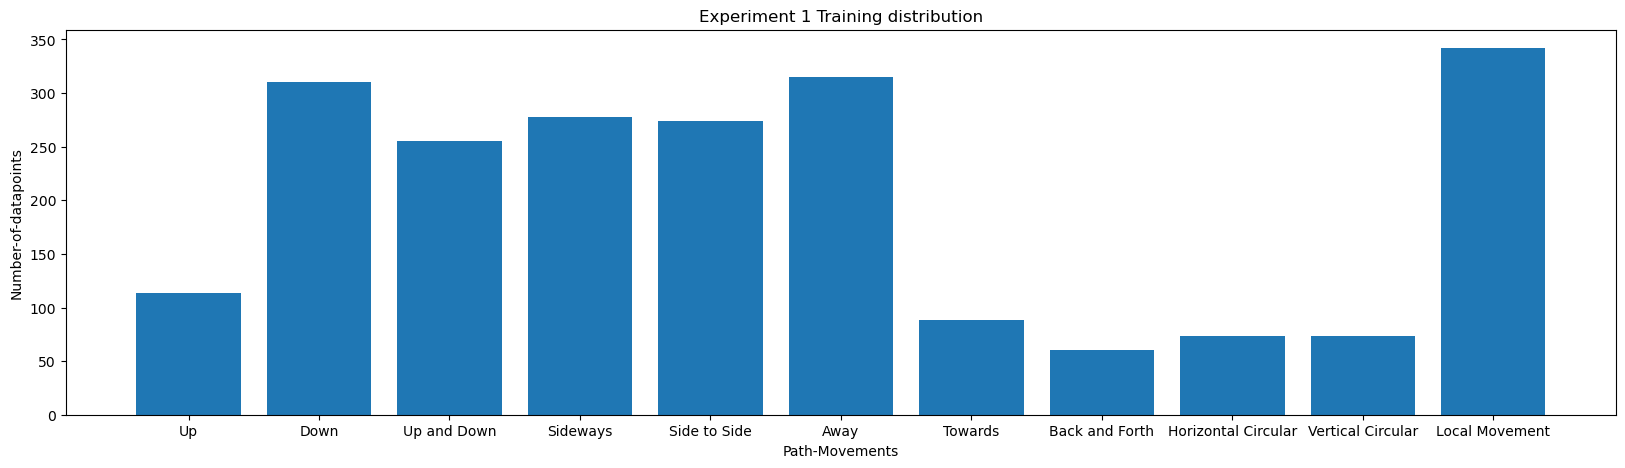

,Class,Count
0,Up,114
1,Down,310
2,Up and Down,255
3,Sideways,278
4,Side to Side,274
5,Away,315
6,Towards,88
7,Back and Forth,60
8,Horizontal Circular,73
9,Vertical Circular,73


In [44]:
# plot the data
class_counts_df = data_pandas(y_train, label_keys,1)
print("number of each usability: ", count_usability(usability))
plt.figure(figsize = (20, 5))
plt.bar(class_counts_df['Class'], class_counts_df['Count'])
plt.xlabel("Path-Movements")
plt.ylabel("Number-of-datapoints")
plt.title('Experiment 1 Training distribution')
plt.show()
class_counts_df

In [5]:
[class_counts_df['Class'], (class_counts_df['Count']/sum(class_counts_df['Count']))*100]

[0                      Up
 1                    Down
 2             Up and Down
 3                Sideways
 4            Side to Side
 5                    Away
 6                 Towards
 7          Back and Forth
 8     Horizontal Circular
 9       Vertical Circular
 10         Local Movement
 Name: Class, dtype: object,
 0      5.224565
 1     14.207149
 2     11.686526
 3     12.740605
 4     12.557287
 5     14.436297
 6      4.032997
 7      2.749771
 8      3.345555
 9      3.345555
 10    15.673694
 Name: Count, dtype: float64]

### Model Loading

In [6]:
lda, qda, gnb, knn, dtc, rfc = get_experiement(experiment=1)

### Model Analysis

|    | Model                           |   Training Accuracy |   Test Accuracy |
|---:|:--------------------------------|--------------------:|----------------:|
|  0 | Linear Discriminant Analysis    |            0.985793 |        0.158922 |
|  1 | Quadratic Discriminant Analysis |            1        |        0.139405 |
|  2 | Gaussian Naive Bayes            |            0.180568 |        0.144981 |
|  3 | KNeighbors Classifier           |            0.272686 |        0.210037 |
|  4 | Decision Tree lassifier         |            0.396884 |        0.201673 |
|  5 | Random Forest Classifier        |            0.820807 |        0.300186 |


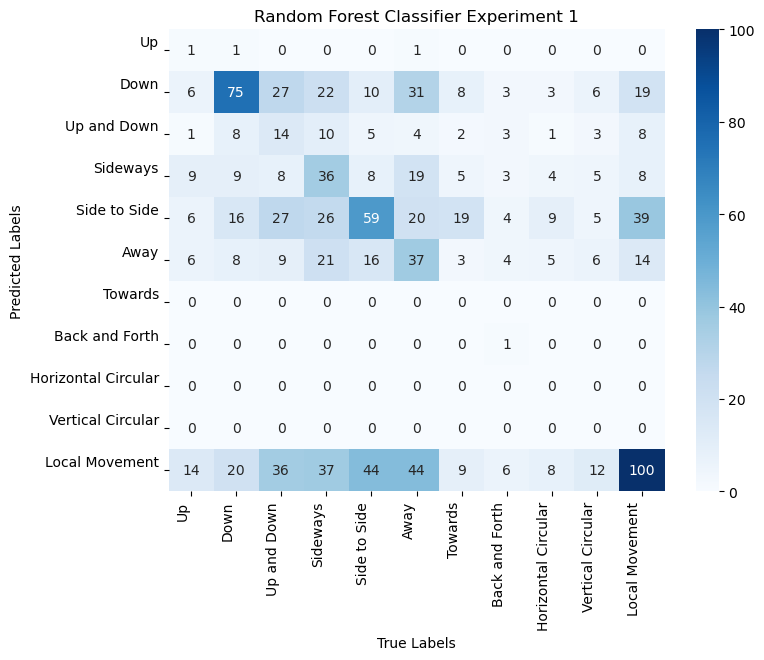

In [7]:
modelNames = ['Linear Discriminant Analysis', 
              'Quadratic Discriminant Analysis', 
              'Gaussian Naive Bayes', 
              'KNeighbors Classifier', 
              'Decision Tree lassifier', 
              'Random Forest Classifier']

trainScore = [lda.score(X_train, y_train), 
              qda.score(X_train, y_train), 
              gnb.score(X_train, y_train), 
              knn.score(X_train, y_train), 
              dtc.score(X_train, y_train), 
              rfc.score(X_train, y_train)]

testScore = [lda.score(X_test, y_test), 
             qda.score(X_test, y_test), 
             gnb.score(X_test, y_test), 
             knn.score(X_test, y_test), 
             dtc.score(X_test, y_test), 
             rfc.score(X_test, y_test)]


results = result_data_frame(modelNames, trainScore, testScore)
print_data_Frame(results)
plot_confusion(label_keys, rfc, X_test, y_test, modelNames[5] + ' Experiment 1', 11)

## F1 scores

In [11]:
modelNames = ['Linear Discriminant Analysis', 
              'Quadratic Discriminant Analysis', 
              'Gaussian Naive Bayes', 
              'KNeighbors Classifier', 
              'Decision Tree lassifier', 
              'Random Forest Classifier']

trainScore = [get_f1score(lda, X_train, y_train), 
              get_f1score(qda, X_train, y_train), 
              get_f1score(gnb, X_train, y_train), 
              get_f1score(knn, X_train, y_train), 
              get_f1score(dtc, X_train, y_train), 
              get_f1score(rfc, X_train, y_train)]

testScore = [get_f1score(lda, X_test, y_test), 
             get_f1score(qda, X_test, y_test), 
             get_f1score(gnb, X_test, y_test), 
             get_f1score(knn, X_test, y_test), 
             get_f1score(dtc, X_test, y_test), 
             get_f1score(rfc, X_test, y_test)]

results = result_data_frame(modelNames, trainScore, testScore)
print_data_Frame(results)

|    | Model                           |   Training Accuracy |   Test Accuracy |
|---:|:--------------------------------|--------------------:|----------------:|
|  0 | Linear Discriminant Analysis    |            0.985797 |        0.1624   |
|  1 | Quadratic Discriminant Analysis |            1        |        0.137191 |
|  2 | Gaussian Naive Bayes            |            0.186885 |        0.155046 |
|  3 | KNeighbors Classifier           |            0.241786 |        0.179362 |
|  4 | Decision Tree lassifier         |            0.381897 |        0.183612 |
|  5 | Random Forest Classifier        |            0.815966 |        0.261256 |


# Experiment 2 (Movement) - Non-deep learning models with stratification

### Load in the data

In [50]:
X_train, X_test, y_train, y_test = get_splits(2)
X, Y = get_X_Y(X_train, X_test, y_train, y_test)

number of each usability:  {0: 2882, 1: 3014, 2: 5088, 3: 5467, 4: 333}


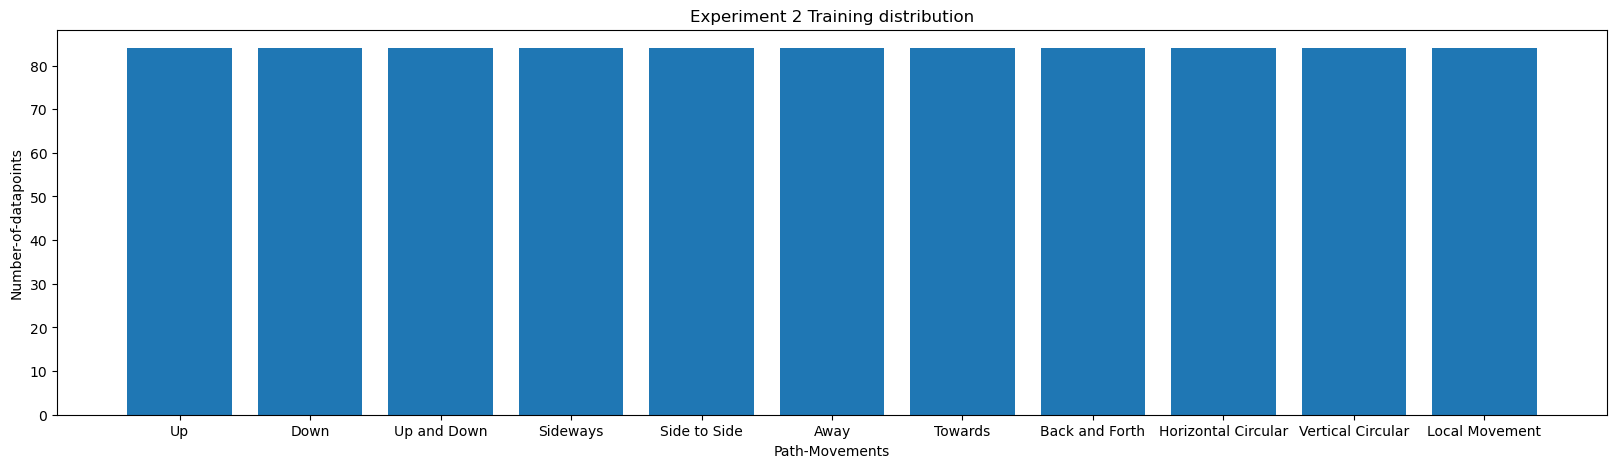

,Class,Count
0,Up,84
1,Down,84
2,Up and Down,84
3,Sideways,84
4,Side to Side,84
5,Away,84
6,Towards,84
7,Back and Forth,84
8,Horizontal Circular,84
9,Vertical Circular,84


In [51]:
# plot the data
class_counts_df = data_pandas(y_train, label_keys, 1)
print("number of each usability: ", count_usability(usability))
plt.figure(figsize = (20, 5))
plt.bar(class_counts_df['Class'], class_counts_df['Count'])
plt.xlabel("Path-Movements")
plt.ylabel("Number-of-datapoints")
plt.title('Experiment 2 Training distribution')
plt.show()
class_counts_df

In [14]:
[class_counts_df['Class'], (class_counts_df['Count']/sum(class_counts_df['Count']))*100]

[0                      Up
 1                    Down
 2             Up and Down
 3                Sideways
 4            Side to Side
 5                    Away
 6                 Towards
 7          Back and Forth
 8     Horizontal Circular
 9       Vertical Circular
 10         Local Movement
 Name: Class, dtype: object,
 0     9.090909
 1     9.090909
 2     9.090909
 3     9.090909
 4     9.090909
 5     9.090909
 6     9.090909
 7     9.090909
 8     9.090909
 9     9.090909
 10    9.090909
 Name: Count, dtype: float64]

### Model Loading

In [28]:
lda, qda, gnb, knn, dtc, rfc = get_experiement(experiment=2)

### Model Analysis

|    | Model                           |   Training Accuracy |   Test Accuracy |
|---:|:--------------------------------|--------------------:|----------------:|
|  0 | Linear Discriminant Analysis    |            0.959957 |       0.161097  |
|  1 | Quadratic Discriminant Analysis |            1        |       0.0856898 |
|  2 | Gaussian Naive Bayes            |            0.244589 |       0.112254  |
|  3 | KNeighbors Classifier           |            0.280303 |       0.156812  |
|  4 | Decision Tree lassifier         |            0.579004 |       0.135818  |
|  5 | Random Forest Classifier        |            0.908009 |       0.218937  |


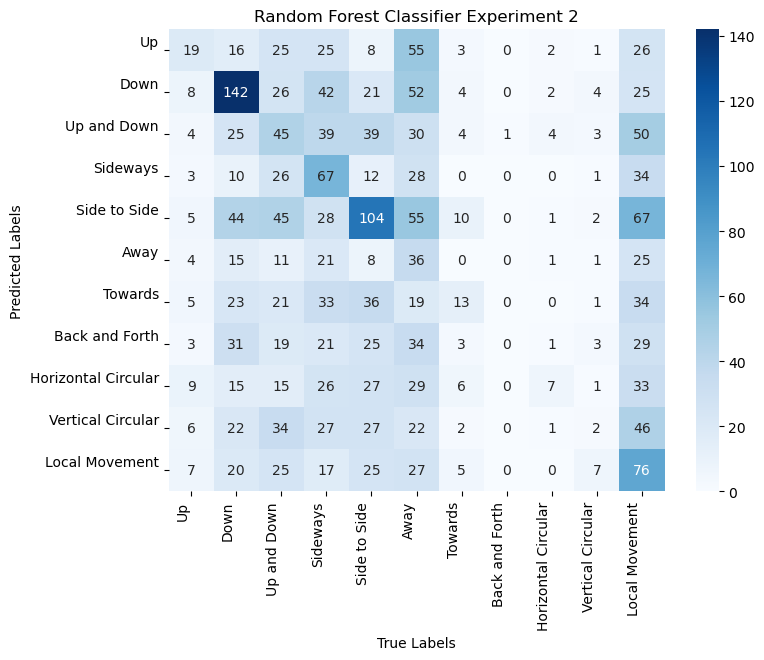

In [16]:
modelNames = ['Linear Discriminant Analysis', 
              'Quadratic Discriminant Analysis', 
              'Gaussian Naive Bayes', 
              'KNeighbors Classifier', 
              'Decision Tree lassifier', 
              'Random Forest Classifier']

trainScore = [lda.score(X_train, y_train), 
              qda.score(X_train, y_train), 
              gnb.score(X_train, y_train), 
              knn.score(X_train, y_train), 
              dtc.score(X_train, y_train), 
              rfc.score(X_train, y_train)]

testScore = [lda.score(X_test, y_test), 
             qda.score(X_test, y_test), 
             gnb.score(X_test, y_test), 
             knn.score(X_test, y_test), 
             dtc.score(X_test, y_test), 
             rfc.score(X_test, y_test)]


results = result_data_frame(modelNames, trainScore, testScore)
print_data_Frame(results)
plot_confusion(label_keys, rfc, X_test, y_test, modelNames[5]  + ' Experiment 2', 11)

## F1 scores

In [17]:
modelNames = ['Linear Discriminant Analysis', 
              'Quadratic Discriminant Analysis', 
              'Gaussian Naive Bayes', 
              'KNeighbors Classifier', 
              'Decision Tree lassifier', 
              'Random Forest Classifier']

trainScore = [get_f1score(lda, X_train, y_train), 
              get_f1score(qda, X_train, y_train), 
              get_f1score(gnb, X_train, y_train), 
              get_f1score(knn, X_train, y_train), 
              get_f1score(dtc, X_train, y_train), 
              get_f1score(rfc, X_train, y_train)]

testScore = [get_f1score(lda, X_test, y_test), 
             get_f1score(qda, X_test, y_test), 
             get_f1score(gnb, X_test, y_test), 
             get_f1score(knn, X_test, y_test), 
             get_f1score(dtc, X_test, y_test), 
             get_f1score(rfc, X_test, y_test)]

results = result_data_frame(modelNames, trainScore, testScore)
print_data_Frame(results)

|    | Model                           |   Training Accuracy |   Test Accuracy |
|---:|:--------------------------------|--------------------:|----------------:|
|  0 | Linear Discriminant Analysis    |            0.960254 |        0.1857   |
|  1 | Quadratic Discriminant Analysis |            1        |        0.104647 |
|  2 | Gaussian Naive Bayes            |            0.235022 |        0.129612 |
|  3 | KNeighbors Classifier           |            0.273949 |        0.166414 |
|  4 | Decision Tree lassifier         |            0.580292 |        0.157741 |
|  5 | Random Forest Classifier        |            0.909017 |        0.241153 |


# Experiment 3 (Movement)- Non-deep learning models with stratification and local movements removed

### Load in the data

In [45]:
X_train, X_test, y_train, y_test = get_splits(3)
X, Y = get_X_Y(X_train, X_test, y_train, y_test)

number of each usability:  {0: 2882, 1: 3014, 2: 5088, 3: 5467, 4: 333}


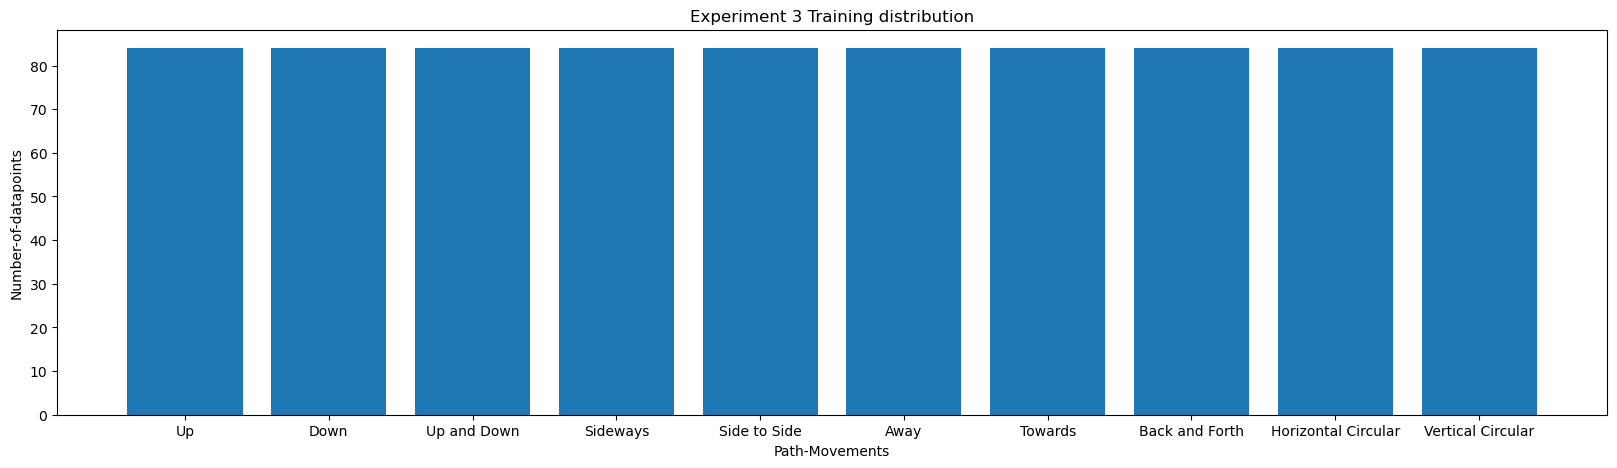

,Class,Count
0,Up,84
1,Down,84
2,Up and Down,84
3,Sideways,84
4,Side to Side,84
5,Away,84
6,Towards,84
7,Back and Forth,84
8,Horizontal Circular,84
9,Vertical Circular,84


In [48]:
# plot the data
class_counts_df = data_pandas(y_train, label_keys, 1)
print("number of each usability: ", count_usability(usability))
plt.figure(figsize = (20, 5))
plt.bar(class_counts_df['Class'], class_counts_df['Count'])
plt.xlabel("Path-Movements")
plt.ylabel("Number-of-datapoints")
plt.title('Experiment 3 Training distribution')
plt.show()
class_counts_df

### Model Loading

In [25]:
lda, qda, gnb, knn, dtc, rfc = get_experiement(3)

### Model Analysis

|    | Model                           |   Training Accuracy |   Test Accuracy |
|---:|:--------------------------------|--------------------:|----------------:|
|  0 | Linear Discriminant Analysis    |            0.95119  |        0.162076 |
|  1 | Quadratic Discriminant Analysis |            1        |        0.107521 |
|  2 | Gaussian Naive Bayes            |            0.247619 |        0.132945 |
|  3 | KNeighbors Classifier           |            0.270238 |        0.158898 |
|  4 | Decision Tree lassifier         |            1        |        0.162606 |
|  5 | Random Forest Classifier        |            0.925    |        0.23464  |


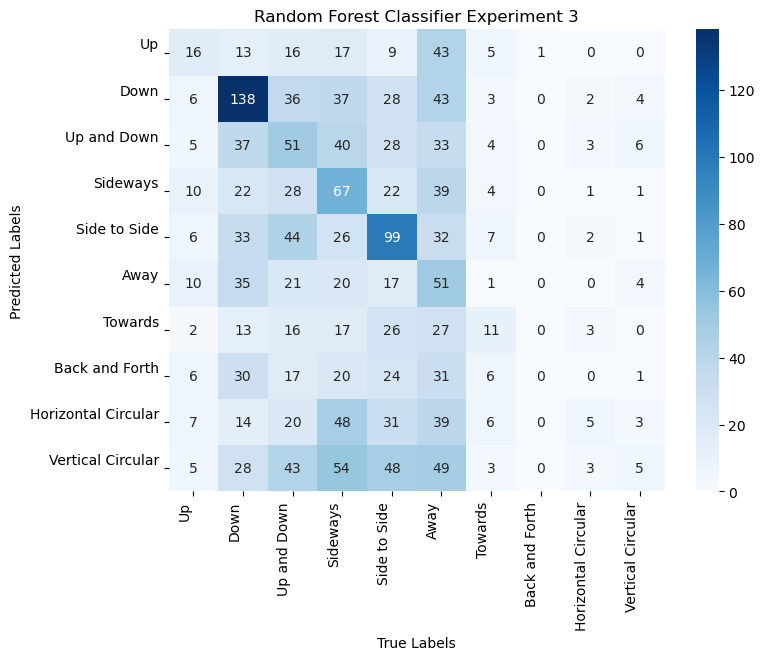

|    | 0                   |         1 |
|---:|:--------------------|----------:|
|  0 | Up                  | 0.133333  |
|  1 | Down                | 0.464646  |
|  2 | Up and Down         | 0.246377  |
|  3 | Sideways            | 0.345361  |
|  4 | Side to Side        | 0.396     |
|  5 | Away                | 0.320755  |
|  6 | Towards             | 0.0956522 |
|  7 | Back and Forth      | 0         |
|  8 | Horizontal Circular | 0.0289017 |
|  9 | Vertical Circular   | 0.0210084 |


In [26]:
modelNames = ['Linear Discriminant Analysis', 
              'Quadratic Discriminant Analysis', 
              'Gaussian Naive Bayes', 
              'KNeighbors Classifier', 
              'Decision Tree lassifier', 
              'Random Forest Classifier']

trainScore = [lda.score(X_train, y_train), 
              qda.score(X_train, y_train), 
              gnb.score(X_train, y_train), 
              knn.score(X_train, y_train), 
              dtc.score(X_train, y_train), 
              rfc.score(X_train, y_train)]

testScore = [lda.score(X_test, y_test), 
             qda.score(X_test, y_test), 
             gnb.score(X_test, y_test), 
             knn.score(X_test, y_test), 
             dtc.score(X_test, y_test), 
             rfc.score(X_test, y_test)]


results = result_data_frame(modelNames, trainScore, testScore)
print_data_Frame(results)
plot_confusion(label_keys, rfc, X_test, y_test, modelNames[5]  + ' Experiment 3', 10)
accuracy = class_accuracy(rfc, X_test, y_test, list(label_keys.keys())[:-2])
print_data_Frame(accuracy)

## F1 scores

In [22]:
modelNames = ['Linear Discriminant Analysis', 
              'Quadratic Discriminant Analysis', 
              'Gaussian Naive Bayes', 
              'KNeighbors Classifier', 
              'Decision Tree lassifier', 
              'Random Forest Classifier']

trainScore = [get_f1score(lda, X_train, y_train), 
              get_f1score(qda, X_train, y_train), 
              get_f1score(gnb, X_train, y_train), 
              get_f1score(knn, X_train, y_train), 
              get_f1score(dtc, X_train, y_train), 
              get_f1score(rfc, X_train, y_train)]

testScore = [get_f1score(lda, X_test, y_test), 
             get_f1score(qda, X_test, y_test), 
             get_f1score(gnb, X_test, y_test), 
             get_f1score(knn, X_test, y_test), 
             get_f1score(dtc, X_test, y_test), 
             get_f1score(rfc, X_test, y_test)]

results = result_data_frame(modelNames, trainScore, testScore)
print_data_Frame(results)

|    | Model                           |   Training Accuracy |   Test Accuracy |
|---:|:--------------------------------|--------------------:|----------------:|
|  0 | Linear Discriminant Analysis    |            0.951322 |        0.191452 |
|  1 | Quadratic Discriminant Analysis |            1        |        0.131747 |
|  2 | Gaussian Naive Bayes            |            0.230695 |        0.146058 |
|  3 | KNeighbors Classifier           |            0.263908 |        0.169563 |
|  4 | Decision Tree lassifier         |            1        |        0.189361 |
|  5 | Random Forest Classifier        |            0.925694 |        0.26658  |


# LOAD IN BEFORE EXPERIMENTS

In [2]:
usability = get_usability()
Locations = get_primary_location()
label_keys = get_primary_location_keybinds()

Location data

number of each usability:  {0: 2882, 1: 3014, 2: 5088, 3: 5467, 4: 333}


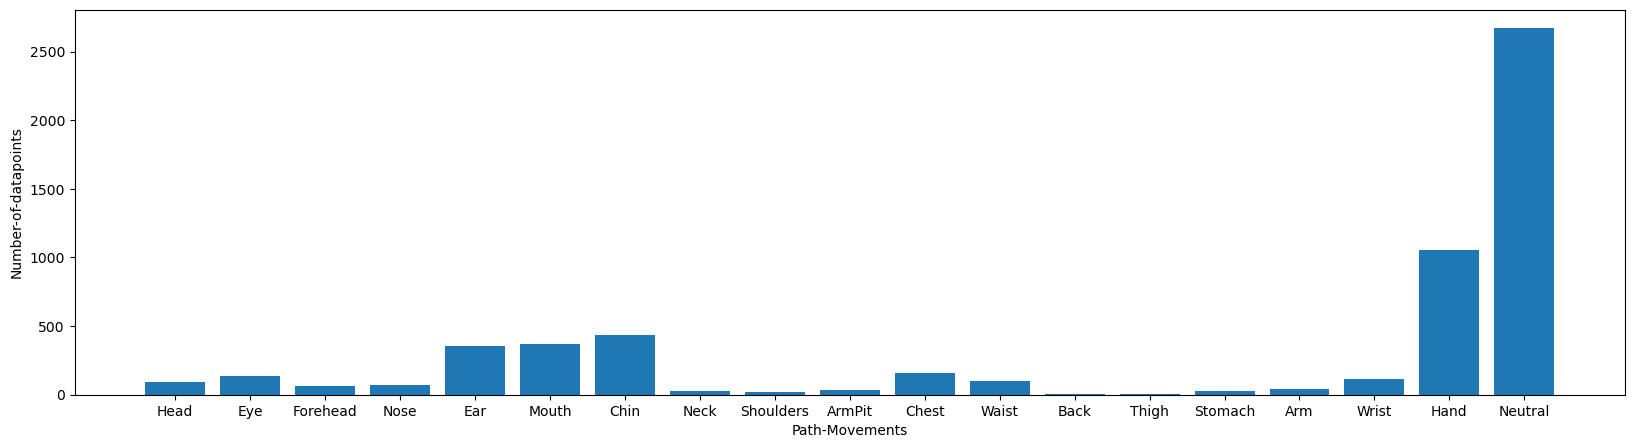

,Class,Count
0,Head,93
1,Eye,138
2,Forehead,67
3,Nose,73
4,Ear,357
5,Mouth,373
6,Chin,437
7,Neck,28
8,Shoulders,19
9,ArmPit,33


In [33]:
X_train, X_test, y_train, y_test = get_splits(4)
X, Y = get_X_Y(X_train, X_test, y_train, y_test)
# plot the data
class_counts_df = data_pandas(Y, label_keys, 1)
print("number of each usability: ", count_usability(usability))
plt.figure(figsize = (20, 5))
plt.bar(class_counts_df['Class'], class_counts_df['Count'])
plt.xlabel("Path-Movements")
plt.ylabel("Number-of-datapoints")
plt.show()
class_counts_df

# Experiment 4 (Location) Non-deep learning models with stratification

In [21]:
X_train, X_test, y_train, y_test = get_splits(4)
X, Y = get_X_Y(X_train, X_test, y_train, y_test)

number of each usability:  {0: 2882, 1: 3014, 2: 5088, 3: 5467, 4: 333}


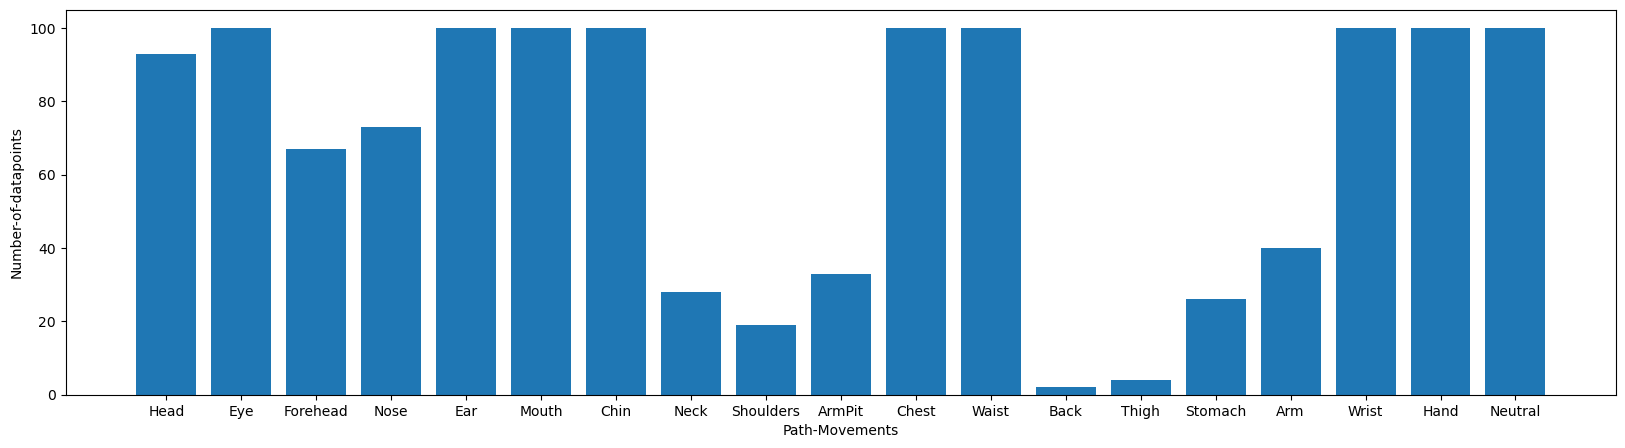

,Class,Count
0,Head,93
1,Eye,100
2,Forehead,67
3,Nose,73
4,Ear,100
5,Mouth,100
6,Chin,100
7,Neck,28
8,Shoulders,19
9,ArmPit,33


In [59]:
# plot the data
class_counts_df = data_pandas(y_train, label_keys, 1)
print("number of each usability: ", count_usability(usability))
plt.figure(figsize = (20, 5))
plt.bar(class_counts_df['Class'], class_counts_df['Count'])
plt.xlabel("Path-Movements")
plt.ylabel("Number-of-datapoints")
plt.show()
class_counts_df

number of each usability:  {0: 2882, 1: 3014, 2: 5088, 3: 5467, 4: 333}


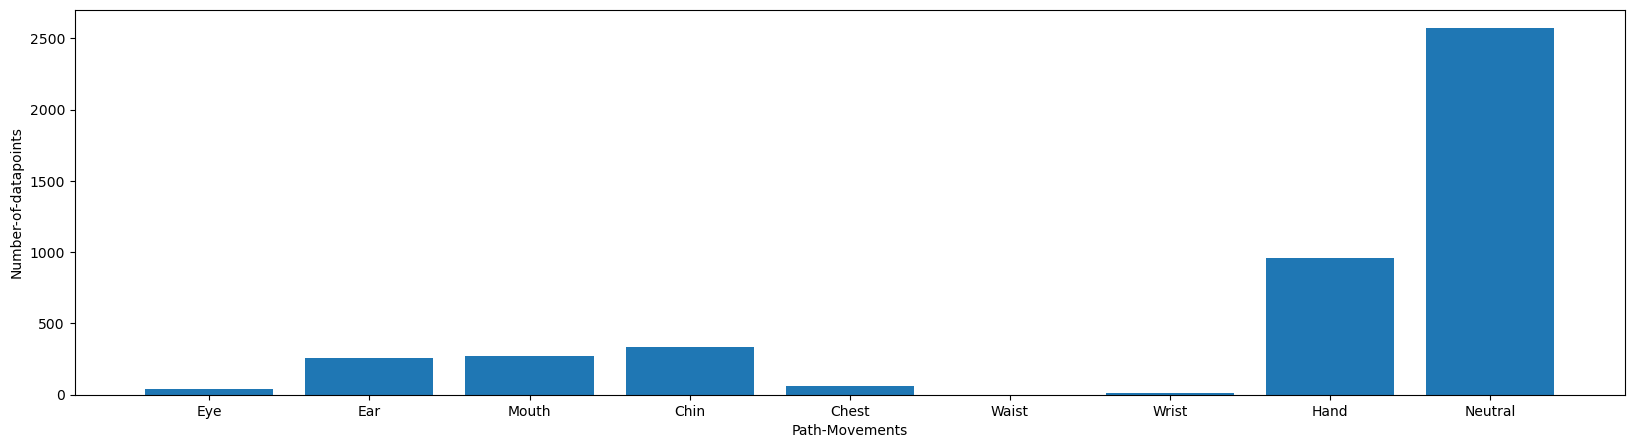

,Class,Count
0,Eye,38
1,Ear,257
2,Mouth,273
3,Chin,337
4,Chest,60
5,Waist,1
6,Wrist,13
7,Hand,957
8,Neutral,2572


In [57]:
# plot the data
class_counts_df = data_pandas(y_test, label_keys, 1)
print("number of each usability: ", count_usability(usability))
plt.figure(figsize = (20, 5))
plt.bar(class_counts_df['Class'], class_counts_df['Count'])
plt.xlabel("Path-Movements")
plt.ylabel("Number-of-datapoints")
plt.show()
class_counts_df

### Model Loading

In [2]:
lda, qda, gnb, knn, dtc, rfc = get_experiement(4)

### Model Analysis

c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:954: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:954: RuntimeWarning: divide b

|    | Model                           |   Training Accuracy |   Test Accuracy |
|---:|:--------------------------------|--------------------:|----------------:|
|  0 | Linear Discriminant Analysis    |          0.981323   |       0.125555  |
|  1 | Quadratic Discriminant Analysis |          0.00155642 |       0         |
|  2 | Gaussian Naive Bayes            |          0.196887   |       0.0290594 |
|  3 | KNeighbors Classifier           |          1          |       0.130878  |
|  4 | Decision Tree Classifier        |          0.718288   |       0.149512  |
|  5 | Random Forest Classifier        |          0.962646   |       0.196096  |


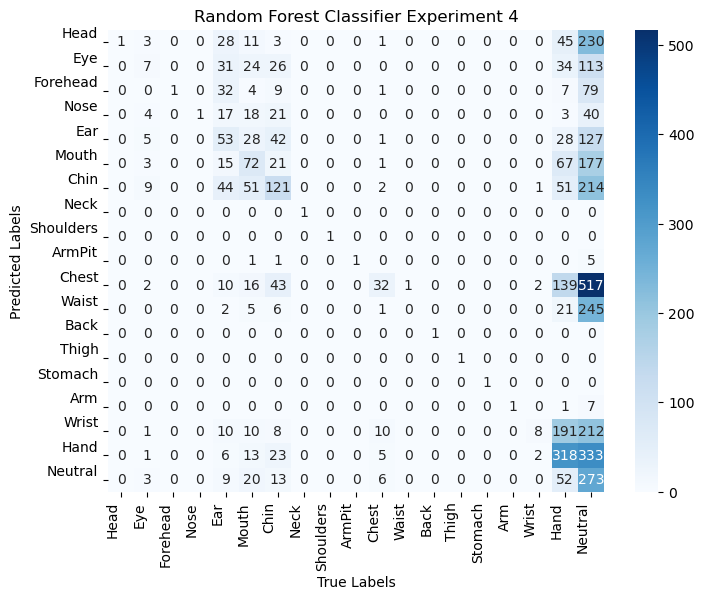

|    | 0         |         1 |
|---:|:----------|----------:|
|  0 | Head      | 0         |
|  1 | Eye       | 0.0297872 |
|  2 | Forehead  | 0         |
|  3 | Nose      | 0         |
|  4 | Ear       | 0.18662   |
|  5 | Mouth     | 0.202247  |
|  6 | Chin      | 0.245436  |
|  7 | Neck      | 0         |
|  8 | Shoulders | 0         |
|  9 | ArmPit    | 0         |
| 10 | Chest     | 0.0419948 |
| 11 | Waist     | 0         |
| 12 | Back      | 0         |
| 13 | Thigh     | 0         |
| 14 | Stomach   | 0         |
| 15 | Arm       | 0         |
| 16 | Wrist     | 0.0177778 |
| 17 | Hand      | 0.453638  |
| 18 | Neutral   | 0.726064  |


In [39]:
modelNames = ['Linear Discriminant Analysis', 
              'Quadratic Discriminant Analysis', 
              'Gaussian Naive Bayes', 
              'KNeighbors Classifier', 
              'Decision Tree Classifier', 
              'Random Forest Classifier']

trainScore = [lda.score(X_train, y_train), 
              qda.score(X_train, y_train), 
              gnb.score(X_train, y_train), 
              knn.score(X_train, y_train), 
              dtc.score(X_train, y_train), 
              rfc.score(X_train, y_train)]

testScore = [lda.score(X_test, y_test), 
             qda.score(X_test, y_test), 
             gnb.score(X_test, y_test), 
             knn.score(X_test, y_test), 
             dtc.score(X_test, y_test), 
             rfc.score(X_test, y_test)]


results = result_data_frame(modelNames, trainScore, testScore)
print_data_Frame(results)
plot_confusion_location(label_keys, rfc, X_test, y_test, modelNames[5]  + ' Experiment 4', 19)
accuracy = class_accuracy_loaction(rfc, X_test, y_test, list(label_keys.keys()), 19)
print_data_Frame(accuracy)

## F1 scores

In [40]:
modelNames = ['Linear Discriminant Analysis', 
              'Quadratic Discriminant Analysis', 
              'Gaussian Naive Bayes', 
              'KNeighbors Classifier', 
              'Decision Tree lassifier', 
              'Random Forest Classifier']

trainScore = [get_f1score(lda, X_train, y_train), 
              get_f1score(qda, X_train, y_train), 
              get_f1score(gnb, X_train, y_train), 
              get_f1score(knn, X_train, y_train), 
              get_f1score(dtc, X_train, y_train), 
              get_f1score(rfc, X_train, y_train)]

testScore = [get_f1score(lda, X_test, y_test), 
             get_f1score(qda, X_test, y_test), 
             get_f1score(gnb, X_test, y_test), 
             get_f1score(knn, X_test, y_test), 
             get_f1score(dtc, X_test, y_test), 
             get_f1score(rfc, X_test, y_test)]

results = result_data_frame(modelNames, trainScore, testScore)
print_data_Frame(results)

c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:954: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:954: RuntimeWarning: divide b

|    | Model                           |   Training Accuracy |   Test Accuracy |
|---:|:--------------------------------|--------------------:|----------------:|
|  0 | Linear Discriminant Analysis    |         0.981298    |       0.169363  |
|  1 | Quadratic Discriminant Analysis |         4.83736e-06 |       0         |
|  2 | Gaussian Naive Bayes            |         0.174762    |       0.0491543 |
|  3 | KNeighbors Classifier           |         1           |       0.174954  |
|  4 | Decision Tree lassifier         |         0.717385    |       0.204257  |
|  5 | Random Forest Classifier        |         0.960504    |       0.235502  |


# Average time to predict

In [29]:
import time
modelNames = ['Linear Discriminant Analysis', 
              'Quadratic Discriminant Analysis', 
              'Gaussian Naive Bayes', 
              'KNeighbors Classifier', 
              'Decision Tree lassifier', 
              'Random Forest Classifier']
models = [lda, qda, gnb, knn, dtc, rfc]
for i, model in enumerate(models):
    start = time.time()
    model.predict(X_test)
    end = time.time()
    total_time = (end - start)
    avg_time = (end - start)/ len(X_test)
    print(modelNames[i] + ' average taken : ' + "{:.10f}".format(avg_time * 1000))

Linear Discriminant Analysis average taken : 0.0090950236


c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:951: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
c:\Users\KAI\.conda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:954: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


Quadratic Discriminant Analysis average taken : 0.4252430709
Gaussian Naive Bayes average taken : 0.7287059194
KNeighbors Classifier average taken : 0.1091385374
Decision Tree lassifier average taken : 0.0128657181
Random Forest Classifier average taken : 0.0366037042


# Experiment 5 (Location) Non-deep learning models with stratification weight (Not implemented yet)

In [3]:
X_train, X_test, y_train, y_test = get_splits(4) # same dataset as previous experiment
X, Y = get_X_Y(X_train, X_test, y_train, y_test)

number of each usability:  {0: 2882, 1: 3014, 2: 5088, 3: 5467, 4: 333}


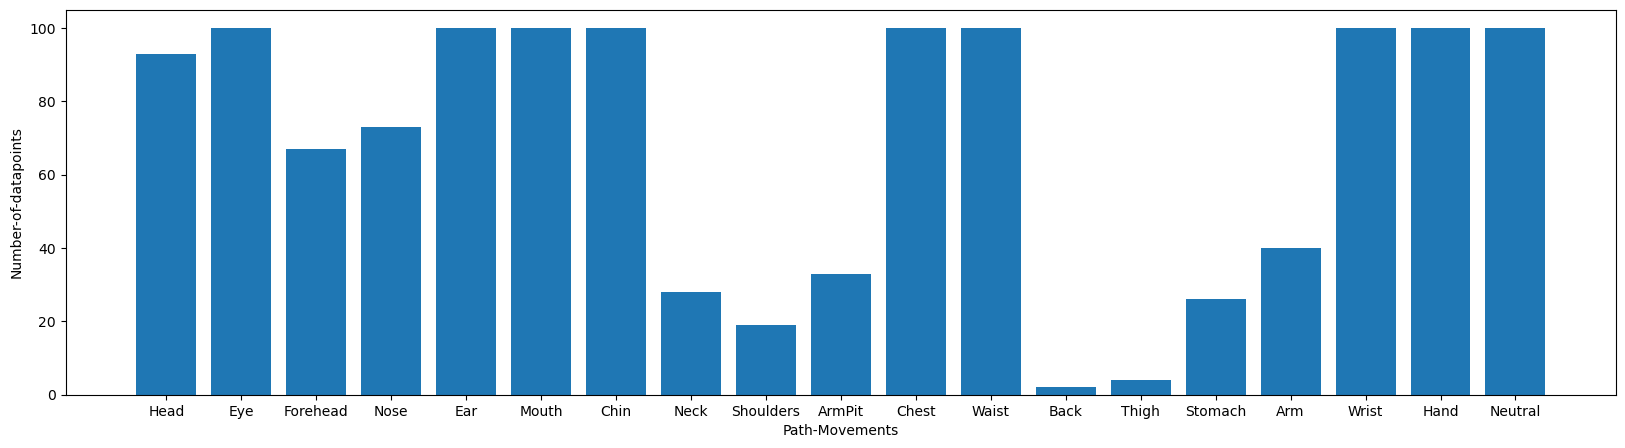

,Class,Count
0,Head,93
1,Eye,100
2,Forehead,67
3,Nose,73
4,Ear,100
5,Mouth,100
6,Chin,100
7,Neck,28
8,Shoulders,19
9,ArmPit,33


In [4]:
# plot the data
class_counts_df = data_pandas(y_train, label_keys, 1)
print("number of each usability: ", count_usability(usability))
plt.figure(figsize = (20, 5))
plt.bar(class_counts_df['Class'], class_counts_df['Count'])
plt.xlabel("Path-Movements")
plt.ylabel("Number-of-datapoints")
plt.show()
class_counts_df

### Model Loading

In [4]:
lda, qda, gnb, knn, dtc, rfc = get_experiement(5)

### Model Analysis

|    | Model                    |   Training Accuracy |   Test Accuracy |
|---:|:-------------------------|--------------------:|----------------:|
|  0 | Decision Tree Classifier |            0.396887 |        0.143966 |
|  1 | Random Forest Classifier |            0.984436 |        0.150843 |


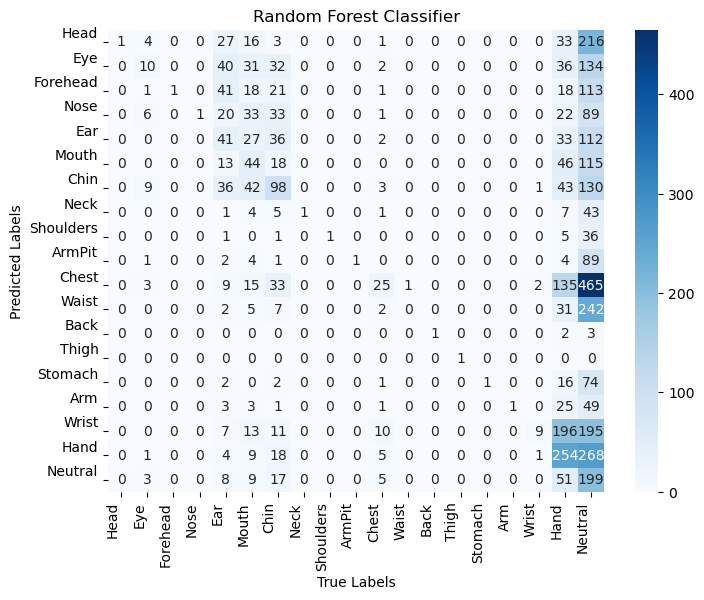

|    | 0         |         1 |
|---:|:----------|----------:|
|  0 | Head      | 0         |
|  1 | Eye       | 0.0350877 |
|  2 | Forehead  | 0         |
|  3 | Nose      | 0         |
|  4 | Ear       | 0.163347  |
|  5 | Mouth     | 0.186441  |
|  6 | Chin      | 0.270718  |
|  7 | Neck      | 0         |
|  8 | Shoulders | 0         |
|  9 | ArmPit    | 0         |
| 10 | Chest     | 0.0363372 |
| 11 | Waist     | 0         |
| 12 | Back      | 0         |
| 13 | Thigh     | 0         |
| 14 | Stomach   | 0         |
| 15 | Arm       | 0         |
| 16 | Wrist     | 0.0204082 |
| 17 | Hand      | 0.453571  |
| 18 | Neutral   | 0.681507  |


In [16]:
modelNames = ['Decision Tree Classifier', 
              'Random Forest Classifier']

trainScore = [dtc.score(X_train, y_train), 
              rfc.score(X_train, y_train)]

testScore = [dtc.score(X_test, y_test), 
             rfc.score(X_test, y_test)]


results = result_data_frame(modelNames, trainScore, testScore)
print_data_Frame(results)
plot_confusion_location(label_keys, rfc, X_test, y_test, modelNames[1], 19)
accuracy = class_accuracy_loaction(rfc, X_test, y_test, list(label_keys.keys()), 19)
print_data_Frame(accuracy)

## F1 scores - appendix

In [5]:
X_train, X_test, y_train, y_test = get_splits(4) 
lda, qda, gnb, knn, dtc, rfc = get_experiement(4)


In [12]:
modelNames = []

# trainScore = ["{:.1f}%".format(get_f1score(dtc, X_train, y_train)*100), 
#               "{:.1f}%".format(get_f1score(rfc, X_train, y_train)*100)]

# testScore = ["{:.1f}%".format(get_f1score(dtc, X_test, y_test)*100), 
#              "{:.1f}%".format(get_f1score(rfc, X_test, y_test)*100)]

trainScore = ["{:.1f}%".format(get_f1score(lda, X_train, y_train)*100), 
              "{:.1f}%".format(get_f1score(qda, X_train, y_train)*100), 
              "{:.1f}%".format(get_f1score(gnb, X_train, y_train)*100), 
              "{:.1f}%".format(get_f1score(knn, X_train, y_train)*100), 
              "{:.1f}%".format(get_f1score(dtc, X_train, y_train)*100), 
              "{:.1f}%".format(get_f1score(rfc, X_train, y_train)*100)]

testScore = ["{:.1f}%".format(get_f1score(lda, X_test, y_test)*100), 
             "{:.1f}%".format(get_f1score(qda, X_test, y_test)*100), 
             "{:.1f}%".format(get_f1score(gnb, X_test, y_test)*100), 
             "{:.1f}%".format(get_f1score(knn, X_test, y_test)*100), 
             "{:.1f}%".format(get_f1score(dtc, X_test, y_test)*100), 
             "{:.1f}%".format(get_f1score(rfc, X_test, y_test)*100)]

# for appendix
results = result_data_frame_no_name(modelNames, trainScore, testScore)
results
